# Introduction

# Data

In [1]:
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

print("Shape of x_train: ", x_train.shape)
print("Shape of y_train: ", y_train.shape)
print()
print("Shape of x_test: ", x_test.shape)
print("Shape of y_test: ", y_test.shape)

Shape of x_train: (60000, 28, 28)
Shape of y_train: (60000,)

Shape of x_test: (10000, 28, 28)
Shape of y_test: (10000,)


Identify labels present in the dataset

In [6]:
import numpy as np
labellist = np.unique(y_train)

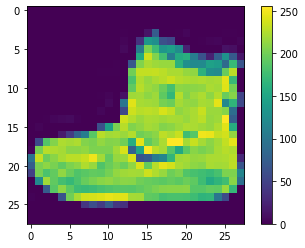

In [9]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

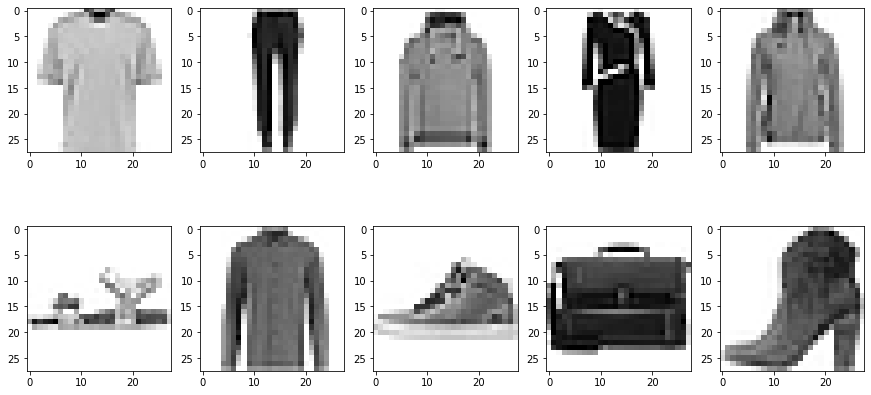

In [10]:
import matplotlib.pyplot as plt

figure, axes = plt.subplots(2, 5, figsize=(15,8))
plt.subplots_adjust(hspace = 0.01, wspace=0.20)
i=0

for item in labellist:
    a = int(np.floor(i/5))
    b = i%5
    indices = np.nonzero(y_train == item)
    axes[a][b].imshow(x_train[indices[0][-1]], cmap=plt.cm.binary)
#     plt.colorbar()
    i=i+1
plt.show()

Assign label names

In [11]:
labelNames = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

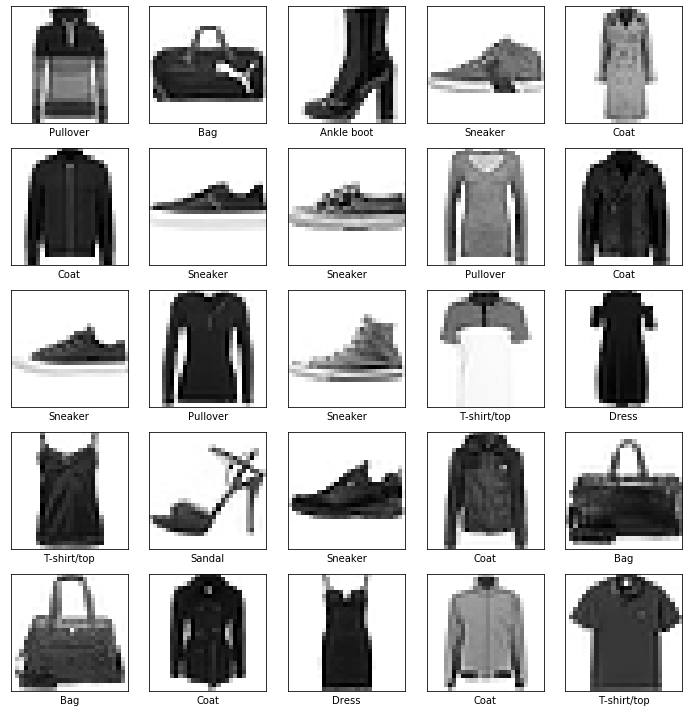

In [12]:
import random

ROW = 5
COLUMN = 5
plt.figure(figsize=(10, 10)) 
for i in range(ROW * COLUMN):
    temp = random.randint(1, len(x_train)+1)
    image = x_train[temp] 
    plt.subplot(ROW, COLUMN, i+1)       
    plt.imshow(image, cmap=plt.cm.binary)  
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(labelNames[y_train[temp]])
    plt.tight_layout()   
    
plt.show()

# Experiments

In [60]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
tf.random.set_seed(1)
np.random.seed(1)

## Fully-connected neural network

In [80]:
num_classes = 10
BATCH_SIZE = 64

model = Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(28, 28)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(num_classes)
])

In [81]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_6 (Rescaling)      (None, 28, 28)            0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 128)               100480    
_________________________________________________________________
dropout_9 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [82]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy', 
    verbose=1,
    patience=5,
    mode='max',
    restore_best_weights=True)

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [83]:
model_FCNN = model.fit(x_train, y_train, epochs=30, validation_split= 0.2, batch_size=BATCH_SIZE, callbacks=[early_stopping])

Epoch 1/30
750/750 [==============================] - 2s 3ms/step - loss: 0.5750 - accuracy: 0.8000 - val_loss: 0.4277 - val_accuracy: 0.8435
Epoch 2/30
750/750 [==============================] - 2s 3ms/step - loss: 0.4151 - accuracy: 0.8527 - val_loss: 0.3979 - val_accuracy: 0.8576
Epoch 3/30
750/750 [==============================] - 2s 3ms/step - loss: 0.3773 - accuracy: 0.8639 - val_loss: 0.3819 - val_accuracy: 0.8601
Epoch 4/30
750/750 [==============================] - 2s 3ms/step - loss: 0.3582 - accuracy: 0.8704 - val_loss: 0.3666 - val_accuracy: 0.8673
Epoch 5/30
750/750 [==============================] - 2s 2ms/step - loss: 0.3372 - accuracy: 0.8774 - val_loss: 0.3520 - val_accuracy: 0.8701
Epoch 6/30
750/750 [==============================] - 2s 3ms/step - loss: 0.3226 - accuracy: 0.8810 - val_loss: 0.3242 - val_accuracy: 0.8835
Epoch 7/30
750/750 [==============================] - 2s 3ms/step - loss: 0.3127 - accuracy: 0.8851 - val_loss: 0.3282 - val_accuracy: 0.8794
Epoch 

In [96]:
best_epochs = np.argmin(model_FCNN.history['val_loss']) + 1
print(best_epochs)

17


In [85]:
test_loss, test_acc = model.evaluate(x_test, y_test, batch_size=BATCH_SIZE, verbose=2)

print('\nTest accuracy:', test_acc)

157/157 - 0s - loss: 0.3404 - accuracy: 0.8849

Test accuracy: 0.8848999738693237


In [89]:
plt.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
def plot_metrics(history):
  metrics = ['loss', 'accuracy']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch, history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.8,1])
    else:
      plt.ylim([0,1])

    plt.legend()

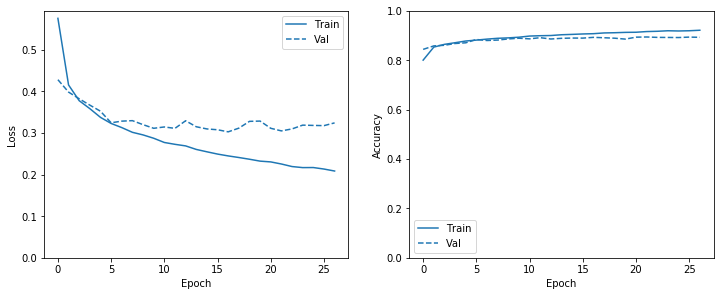

In [90]:
plot_metrics(model_FCNN)

## Convolutional neural network

In [66]:
num_classes = 10

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(28, 28, 1)),
  layers.Conv2D(16,3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dropout(0.2),
  layers.Dense(num_classes)
])

In [67]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_5 (Rescaling)      (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 3136)              0         
_________________________________________________________________
dense_20 (Dense)             (None, 128)               401536    
_________________________________________________________________
dropout_8 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 10)              

In [68]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy', 
    verbose=1,
    patience=5,
    mode='max',
    restore_best_weights=True)

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [69]:
model.fit(x_train, y_train, epochs=30, validation_split= 0.2, batch_size=BATCH_SIZE, callbacks=[early_stopping])

Epoch 1/30
750/750 [==============================] - 17s 23ms/step - loss: 0.4778 - accuracy: 0.8324 - val_loss: 0.3246 - val_accuracy: 0.8850
Epoch 2/30
750/750 [==============================] - 20s 27ms/step - loss: 0.3167 - accuracy: 0.8865 - val_loss: 0.2939 - val_accuracy: 0.8927
Epoch 3/30
750/750 [==============================] - 17s 22ms/step - loss: 0.2736 - accuracy: 0.9004 - val_loss: 0.2709 - val_accuracy: 0.9010
Epoch 4/30
750/750 [==============================] - 17s 23ms/step - loss: 0.2457 - accuracy: 0.9095 - val_loss: 0.2564 - val_accuracy: 0.9066
Epoch 5/30
750/750 [==============================] - 16s 22ms/step - loss: 0.2234 - accuracy: 0.9177 - val_loss: 0.2488 - val_accuracy: 0.9087
Epoch 6/30
750/750 [==============================] - 13s 17ms/step - loss: 0.2059 - accuracy: 0.9239 - val_loss: 0.2329 - val_accuracy: 0.9156
Epoch 7/30
750/750 [==============================] - 13s 18ms/step - loss: 0.1879 - accuracy: 0.9317 - val_loss: 0.2341 - val_accuracy:

KeyboardInterrupt: 

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test, batch_size=BATCH_SIZE, verbose=2)

print('\nTest accuracy:', test_acc)

# Results

In [58]:
test_predictions_resampled = model.predict(x_test, batch_size=BATCH_SIZE)

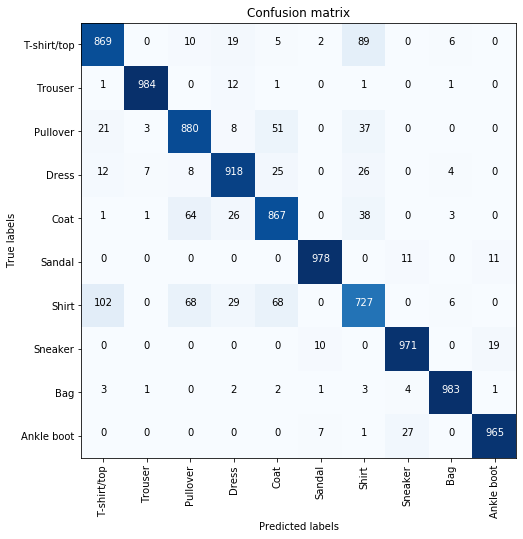

In [59]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, class_, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function plots a confusion matrix
    """
    plt.figure(figsize = (8,8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    tick_marks = np.arange(len(class_))
    plt.xticks(tick_marks, class_, rotation=90)
    plt.yticks(tick_marks, class_)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i,j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True labels')
    plt.xlabel('Predicted labels')
    plt.show()
    
predictions = model.predict(x_test, verbose=0)
predictions = np.argmax(predictions, axis=1)
plot_confusion_matrix(confusion_matrix(y_test, predictions), list(labelNames))

# Conclusions